<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=254924537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.9 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is 

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 26.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 18.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 97.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 103.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 113.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [6]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [7]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [8]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [9]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [11]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64


In [13]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
y            0.0
dtype: float64


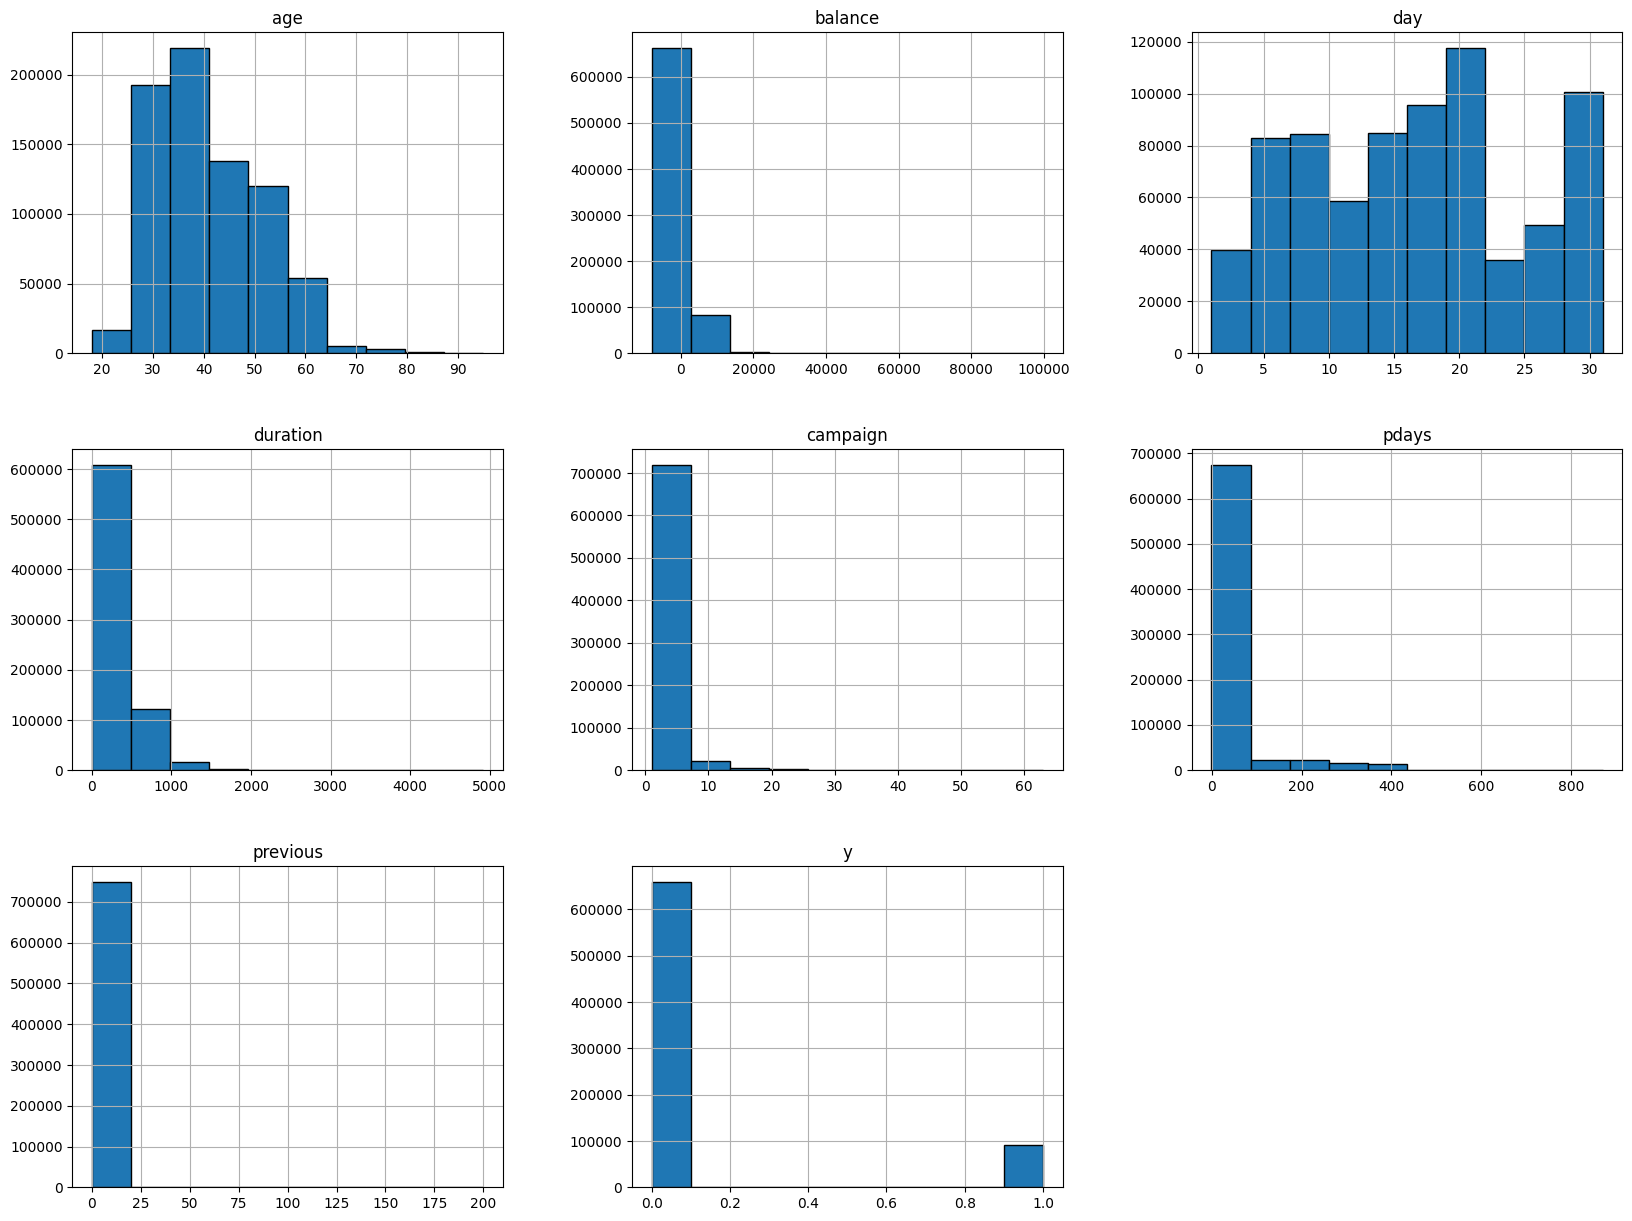

In [14]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [17]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [18]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [19]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [20]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [21]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
395711,7,2,3,1,1,1,1,2,4,-0.388504,0.168426,1.198506,-0.708991,1.997111,-0.302719,-0.221363
374633,4,2,1,1,1,1,1,2,4,1.790809,-0.425033,0.713691,-0.440994,-0.212146,-0.302719,-0.221363
623439,6,2,3,1,1,1,1,4,4,2.781406,-0.055840,-1.589183,-0.184012,-0.580356,-0.302719,-0.221363
334201,4,2,2,1,1,1,3,7,4,-0.487563,-0.170089,-0.619552,2.554688,1.260692,-0.302719,-0.221363
348625,5,2,3,1,1,1,1,2,4,0.800212,0.444527,-1.467979,1.141284,-0.580356,-0.302719,-0.221363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680752,5,2,3,1,1,1,1,2,4,-0.091325,-0.138706,-0.255940,-0.646580,-0.212146,-0.302719,-0.221363
637239,5,2,3,1,1,1,1,6,4,-0.190384,0.977336,-0.983163,0.770495,-0.580356,-0.302719,-0.221363
32706,5,2,3,1,2,1,1,10,4,0.304914,-0.415160,0.107672,-0.742031,-0.580356,-0.302719,-0.221363


Below we define a function to help us do stratified kfold cross validation which we use below

In [22]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [23]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.02754228748381138, valley=0.002511886414140463)

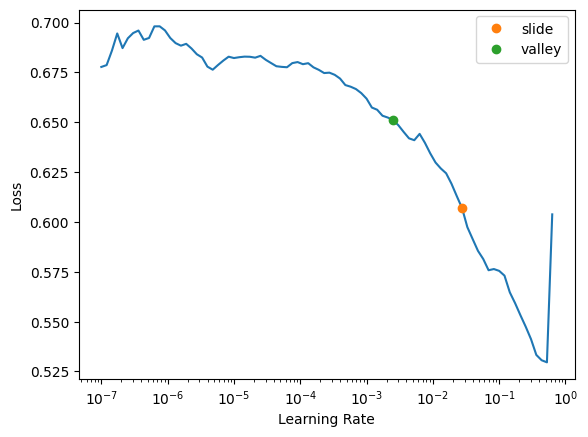

In [24]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [25]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.172676,0.164588,0.958268,01:55
1,0.164545,0.161036,0.960486,01:49


CPU times: user 7min 25s, sys: 2.09 s, total: 7min 27s
Wall time: 3min 45s


In [26]:
dl = test_dl

In [27]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [28]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [29]:
a_preds.shape

torch.Size([250000, 2])

In [30]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [31]:
nn_preds_x

tensor([[7.3207e-01, 2.6793e-01],
        [9.9934e-01, 6.5751e-04],
        [9.9972e-01, 2.7952e-04],
        ...,
        [9.9909e-01, 9.0687e-04],
        [7.0325e-01, 2.9675e-01],
        [9.9978e-01, 2.1693e-04]])

In [32]:
nn_preds_y

tensor([[9.9351e-01, 6.4942e-03],
        [7.6580e-01, 2.3420e-01],
        [9.9985e-01, 1.5106e-04],
        ...,
        [3.7198e-01, 6.2802e-01],
        [9.9701e-01, 2.9932e-03],
        [8.6642e-01, 1.3358e-01]])

In [33]:
a_preds

tensor([[9.9351e-01, 6.4942e-03],
        [7.6580e-01, 2.3420e-01],
        [9.9985e-01, 1.5106e-04],
        ...,
        [3.7198e-01, 6.2802e-01],
        [9.9701e-01, 2.9932e-03],
        [8.6642e-01, 1.3358e-01]])

In [34]:
nn_preds_proba

tensor([6.4942e-03, 2.3420e-01, 1.5106e-04,  ..., 6.2802e-01, 2.9932e-03,
        1.3358e-01])

In [35]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([6.4942e-03, 2.3420e-01, 1.5106e-04,  ..., 6.2802e-01, 2.9932e-03,
        1.3358e-01])

In [36]:
final_preds.shape

torch.Size([250000])

In [37]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.006494
750001,0.234205
750002,0.000151
750003,0.000148
750004,0.024653
...,...
999995,0.000161
999996,0.094304
999997,0.628019


## Decision Trees

### Random Forests

In [38]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 22s, sys: 431 ms, total: 2min 23s
Wall time: 2min 18s


0.9643883414236727

In [39]:
rf_preds_probs,rf_preds_probs.shape

(tensor([4.8936e-06, 2.4863e-01, 3.3333e-03,  ..., 6.3681e-01, 5.3862e-04,
         7.3324e-02]),
 torch.Size([250000]))

In [40]:
rf_preds_probs 

tensor([4.8936e-06, 2.4863e-01, 3.3333e-03,  ..., 6.3681e-01, 5.3862e-04,
        7.3324e-02])

In [41]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [42]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.467136
10,balance,0.094462
7,month,0.071460
9,age,0.068646
11,day,0.056024
8,poutcome,0.040772
4,housing,0.035127
14,pdays,0.032552
6,contact,0.032277
0,job,0.026988


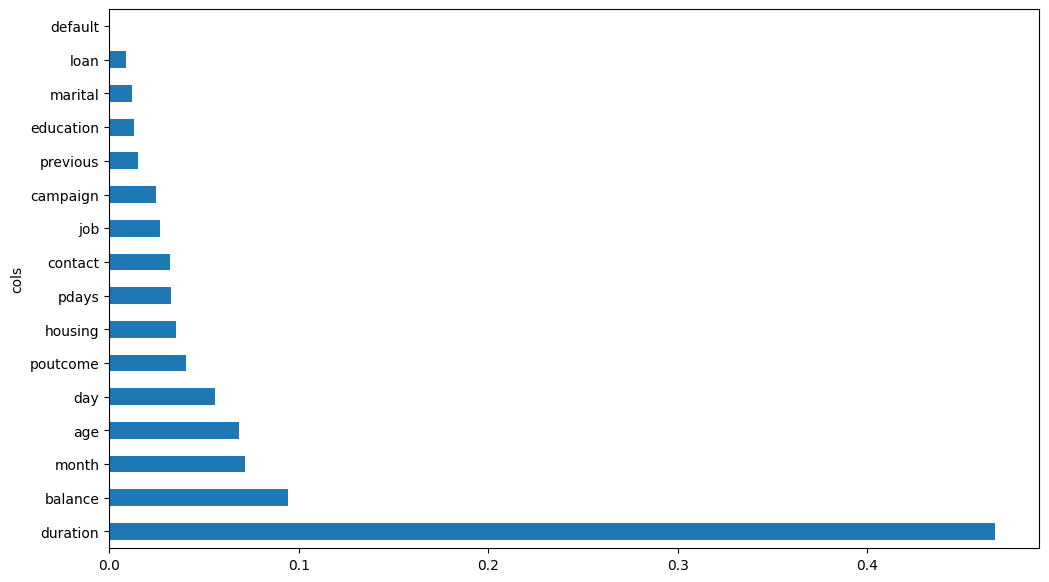

In [43]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [44]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [45]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.963234
Training fold 2/5...
Fold 2 roc_auc: 0.963802
Training fold 3/5...
Fold 3 roc_auc: 0.963721
Training fold 4/5...
Fold 4 roc_auc: 0.962583
Training fold 5/5...
Fold 5 roc_auc: 0.963037

Mean roc_auc: 0.963275


In [46]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [47]:
rf_oof_predictions

array([0.00000000e+00, 0.00000000e+00, 6.71232832e-01, ..., 3.20034659e-04, 7.55057692e-01, 1.32933752e-01])

In [48]:
rf_test_predictions

array([1.80360932e-01, 1.51037152e-04, 1.83699712e-06, ..., 1.04395094e-03, 4.55760899e-01, 8.31513441e-04])

In [49]:
rf_mean_score, rf_fold_scores

(0.9632750851019092,
 [0.9632335246913252,
  0.9638022454220238,
  0.9637205061818243,
  0.9625826007556181,
  0.9630365484587545])

In [50]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000005
750001,0.248628
750002,0.003333
750003,0.000000
750004,0.040198
...,...
999995,0.000000
999996,0.201768
999997,0.636814


## Gradient Boosting

### XGBoost

In [51]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 9.88 s, sys: 47.9 ms, total: 9.92 s
Wall time: 5.05 s


0.9662349298170396

In [52]:
xgb_preds_proba

tensor([2.3716e-03, 7.3349e-02, 2.1209e-04,  ..., 7.4946e-01, 5.5907e-04,
        9.3000e-02])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

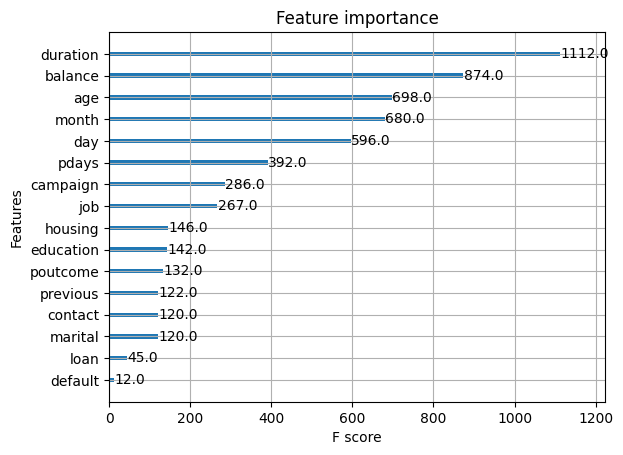

In [53]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [54]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.966167
Training fold 2/5...
Fold 2 roc_auc: 0.966106
Training fold 3/5...
Fold 3 roc_auc: 0.966050
Training fold 4/5...
Fold 4 roc_auc: 0.965244
Training fold 5/5...
Fold 5 roc_auc: 0.965404

Mean roc_auc: 0.965794


In [56]:
xgb_oof_predictions

array([2.91005563e-04, 1.29585818e-03, 2.45108187e-01, ..., 2.05080796e-04, 8.66037130e-01, 1.86036691e-01])

In [57]:
xgb_test_predictions

array([2.70916369e-01, 2.38741810e-04, 1.02356089e-04, ..., 5.33254155e-04, 3.89930934e-01, 2.31222439e-04])

In [58]:
xgb_mean_score

0.9657939476510785

In [59]:
 xgb_fold_scores

[0.96616678584283,
 0.9661057293111853,
 0.9660498469372382,
 0.9652437233956976,
 0.9654036527684419]

In [60]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002372
750001,0.073349
750002,0.000212
750003,0.000177
750004,0.017281
...,...
999995,0.000295
999996,0.049874
999997,0.749462


### LGBM

In [61]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72153, number of negative: 527847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120255 -> initscore=-1.990018
[LightGBM] [Info] Start training from score -1.990018
CPU times: user 15.2 s, sys: 59.9 ms, total: 15.3 s
Wall time: 7.8 s


0.965483840097074

In [62]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[9.9598e-01, 4.0153e-03],
         [8.5660e-01, 1.4340e-01],
         [9.9852e-01, 1.4763e-03],
         ...,
         [2.5528e-01, 7.4472e-01],
         [9.9911e-01, 8.9230e-04],
         [8.9853e-01, 1.0147e-01]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

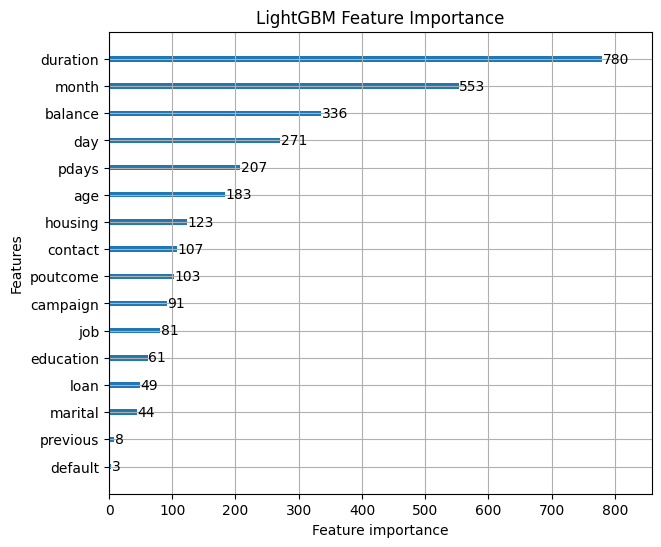

In [63]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [64]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [65]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57723, number of negative: 422277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120256 -> initscore=-1.990006
[LightGBM] [Info] Start training from score -1.990006
Fold 1 roc_auc: 0.965185
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57723, number of negative: 422277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points i

In [66]:
lgbm_oof_predictions

array([8.11779307e-04, 3.26665001e-03, 3.88068210e-01, ..., 5.98809335e-04, 8.87672934e-01, 1.33601606e-01])

In [67]:
lgbm_test_predictions

array([0.29757764, 0.00069325, 0.00045639, ..., 0.00233738, 0.44294554, 0.00083204])

In [68]:
 lgbm_mean_score

0.9648127678969303

In [69]:
lgbm_fold_scores

[0.9651846249160826,
 0.9650179840802177,
 0.9651817282575174,
 0.964513469930593,
 0.9641660323002406]

In [70]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.004015
750001,0.143403
750002,0.001476
750003,0.000807
750004,0.034405
...,...
999995,0.000584
999996,0.098647
999997,0.744724


### CatBoost

In [71]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 4min 42s, sys: 18.4 s, total: 5min 1s
Wall time: 1min 21s


0.9675516887603175

#### CatBoost Feature Importance

In [72]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   47.446463
6    contact   10.056553
7      month   10.055198
10   balance    7.720632
4    housing    5.340729
11       day    4.297441
9        age    2.501008
14     pdays    2.381484
8   poutcome    2.329568
13  campaign    2.229874


#### Cross validation - CatBoost

In [73]:
cat_model = CatBoostClassifier()
cat_model

In [74]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4852164	total: 60.9ms	remaining: 1m
1:	learn: 0.3667428	total: 118ms	remaining: 58.7s
2:	learn: 0.2993999	total: 175ms	remaining: 58.3s
3:	learn: 0.2620360	total: 230ms	remaining: 57.3s
4:	learn: 0.2388091	total: 286ms	remaining: 56.8s
5:	learn: 0.2241270	total: 343ms	remaining: 56.7s
6:	learn: 0.2139645	total: 404ms	remaining: 57.3s
7:	learn: 0.2069088	total: 462ms	remaining: 57.3s
8:	learn: 0.2026824	total: 521ms	remaining: 57.4s
9:	learn: 0.1986800	total: 581ms	remaining: 57.5s
10:	learn: 0.1953616	total: 636ms	remaining: 57.2s
11:	learn: 0.1927376	total: 691ms	remaining: 56.9s
12:	learn: 0.1908615	total: 745ms	remaining: 56.6s
13:	learn: 0.1891213	total: 797ms	remaining: 56.2s
14:	learn: 0.1874410	total: 855ms	remaining: 56.2s
15:	learn: 0.1859275	total: 915ms	remaining: 56.3s
16:	learn: 0.1848406	total: 969ms	remaining: 56s
17:	learn: 0.1831383	total: 1.03s	remaining: 56s
18:	learn: 0.1820398	total: 1.08s	remaining: 56

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [75]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.7279e-03, 8.1655e-02, 1.8637e-04,  ..., 7.1790e-01, 8.7649e-04,
        1.4182e-01])

In [76]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([2.8012e-01, 3.1861e-04, 1.2257e-04,  ..., 8.5529e-04, 3.8996e-01,
        4.1511e-04])

In [77]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9676551394455383

#### CatBoost + LGBM

In [78]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0035, 0.1167, 0.0008,  ..., 0.7155, 0.0010, 0.1461])

In [79]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [80]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9674685037850531

#### XGBoost + LGBM

In [81]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([3.1935e-03, 1.0838e-01, 8.4417e-04,  ..., 7.4709e-01, 7.2569e-04,
        9.7234e-02])

In [82]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9667252251224591

In [83]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003193
750001,0.108376
750002,0.000844
750003,0.000492
750004,0.025843
...,...
999995,0.000440
999996,0.074261
999997,0.747093


#### CatBoost + LGBM + XGBoost

In [84]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.1570e-03, 1.0224e-01, 6.1633e-04,  ..., 7.2684e-01, 8.8176e-04,
        1.2837e-01])

In [85]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9675764913994952

## AutoML

### AutoGluon

In [86]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
Time_limit = 3600*8
#Time_limit = 300
problem_type='binary'

In [87]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    #ag_args_fit={'num_gpus': 1}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250808_083356"
2025-08-08 08:33:57,330	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-08 08:34:02,086	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=1335) 	Ran out of time, early stopping on iteration 521.
(_ray_fit pid=1475) 	Ran out of time, early stopping on iteration 525. [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=1757) 	Ran out of time, stopping training early. (Stopping on epoch 0)
(_ray_fit pid=1540) 	Ran out of time, early stopping on iteration 532. [repeated 3x across cluster]
(_ray_fit pid=1756) 	Ran out of time, stoppi

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.970138     roc_auc    1213.886718  20299.859067                0.164312          94.138196            3       True         23
1           CatBoost_BAG_L2   0.969852     roc_auc    1059.361657  18219.507367                2.576159        4385.076568            2       True         18
2         LightGBMXT_BAG_L2   0.969823     roc_auc    1124.469768  14196.633485               67.684270         362.202686            2       True         14
3           LightGBM_BAG_L2   0.969821     roc_auc    1063.789901  13925.174784                7.004404          90.743985            2       True         15
4    NeuralNetFastAI_BAG_L2   0.969725     roc_auc    1077.370913  14383.239485               20.585416         548.808686            2       True  

In [88]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [89]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.970138     roc_auc    1213.886718  20299.859067                0.164312          94.138196            3       True         23
1           CatBoost_BAG_L2   0.969852     roc_auc    1059.361657  18219.507367                2.576159        4385.076568            2       True         18
2         LightGBMXT_BAG_L2   0.969823     roc_auc    1124.469768  14196.633485               67.684270         362.202686            2       True         14
3           LightGBM_BAG_L2   0.969821     roc_auc    1063.789901  13925.174784                7.004404          90.743985            2       True         15
4    NeuralNetFastAI_BAG_L2   0.969725     roc_auc    1077.370913  14383.239485               20.585416         548.808686            2       True  

In [90]:
%%time
predictor.leaderboard()

CPU times: user 8.42 ms, sys: 916 µs, total: 9.33 ms
Wall time: 8.65 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.970138,roc_auc,1213.886718,20299.859067,0.164312,94.138196,3,True,23
1,CatBoost_BAG_L2,0.969852,roc_auc,1059.361657,18219.507367,2.576159,4385.076568,2,True,18
2,LightGBMXT_BAG_L2,0.969823,roc_auc,1124.469768,14196.633485,67.684270,362.202686,2,True,14
3,LightGBM_BAG_L2,0.969821,roc_auc,1063.789901,13925.174784,7.004404,90.743985,2,True,15
4,NeuralNetFastAI_BAG_L2,0.969725,roc_auc,1077.370913,14383.239485,20.585416,548.808686,2,True,21
5,RandomForestEntr_BAG_L2,0.969538,roc_auc,1089.118348,14423.637167,32.332851,589.206368,2,True,17
6,RandomForestGini_BAG_L2,0.969336,roc_auc,1083.539306,14229.682580,26.753808,395.251781,2,True,16
7,ExtraTreesEntr_BAG_L2,0.969304,roc_auc,1086.693810,14007.573523,29.908313,173.142724,2,True,20
8,WeightedEnsemble_L2,0.969163,roc_auc,359.019544,10092.709308,0.160185,53.499582,2,True,13
9,ExtraTreesGini_BAG_L2,0.969072,roc_auc,1085.270907,13954.469693,28.485410,120.038894,2,True,19


In [91]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 36min 44s, sys: 22.9 s, total: 37min 7s
Wall time: 18min 40s


,0,1
id,,
750000,0.998820,0.001180
750001,0.909144,0.090856
750002,0.999814,0.000186
750003,0.999801,0.000199
750004,0.987696,0.012304


In [92]:
predictions = autogluon_preds_proba

In [93]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 37min 59s, sys: 20.8 s, total: 38min 20s
Wall time: 19min 6s


id
750000    0.001180
750001    0.090856
750002    0.000186
750003    0.000199
750004    0.012304
Name: y, dtype: float32

In [94]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [95]:
autogluon_preds_proba.values

array([1.1799955e-03, 9.0856023e-02, 1.8627531e-04, ..., 6.8271875e-01, 5.0683931e-04, 1.7403279e-01], dtype=float32)

In [96]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001180
750001,0.090856
750002,0.000186
750003,0.000199
750004,0.012304
...,...
999995,0.000167
999996,0.091521
999997,0.682719


In [97]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [98]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [99]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967655
7,CatBoost_XGB_LGBM_average,0.967576
3,CatBoost,0.967552
5,CatBoost_LGBM_average,0.967469
6,XGB_LGBM_average,0.966725
1,XGBoost,0.966235
2,LGBM,0.965484
0,Random Forest,0.964388
